In [10]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.integrate import solve_ivp, odeint

<p align="center">🦋 🦋 🦋</p>

## The Lorenz System: WORK IN PROGRESS

As we move forward, let's recall that the cosine ODE we just explored was *not* state dependent. 

A direct result of that is that errors do not compound over time. But, many ODEs used in IVP solutions are state dependent. Depending on for how "long" the IVP is meant to process, that could be a big difference.

And, as we just saw, not all implementations are alike.

<p align="center">. . .</p>

Back to the books: This example is adopted from the book chapter's [Problems](https://pythonnumericalmethods.studentorg.berkeley.edu/notebooks/chapter22.08-Summary-and-Problems.html#problems) section.

The Lorenz system is a set of three coupled, nonlinear differential equations:

$$\begin{align}
\frac{dx}{dt} &= \sigma(y - x) \\
\frac{dy}{dt} &= x(\rho - z) - y \\
\frac{dz}{dt} &= xy - \beta z
\end{align}$$

Where:
- $\sigma$ (sigma) is the Prandtl number
- $\rho$ (rho) is the Rayleigh number
- $\beta$ (beta) is related to the physical dimensions of the system

The homework problem suggests the initial values $\sigma = 10$, $\rho = 28$, and $\beta = 8/3$, which produce the famous "butterfly" strange attractor.

We will set up our system and conditions below, and once again we'll work between the two solvers.

In [11]:
# constants
sigma = 10
rho = 28
beta = 8/3

def lorenz_func_ivp(t, S):
    x, y, z = S
    dxdt = sigma * (y - x)
    dydt = x * (rho - z) - y
    dzdt = x * y - beta * z
    return [dxdt, dydt, dzdt]

def lorenz_func_odeint(S, t):
    x, y, z = S
    dxdt = sigma * (y - x)
    dydt = x * (rho - z) - y
    dzdt = x * y - beta * z
    return [dxdt, dydt, dzdt]

# initial conditions
t0 = 0
t_eval = np.linspace(t0, 50, 51) # start at zero!
s0 = np.array([1, 2, 3])
# solve using solve_ivp
solution_ivp = solve_ivp(lorenz_func_ivp, 
                         [0, 1000], 
                         s0, 
                         t_eval=t_eval,
                         method='RK45'
                        )

# solve using odeint
solution_odeint = odeint(lorenz_func_odeint, s0, t_eval)

# sanity check: (should be [10, 23, -6])
dS_ivp = lorenz_func_ivp(t0, s0)
dS_odeint = lorenz_func_odeint(s0, t0)

print("dS_ivp sanity check at t = 0:")
print(dS_ivp)
print("--------------------------------")
print("dS_odeint sanity check at t = 0:")
print(dS_odeint)
print("--------------------------------")
print("solve_ivp solution, t = 1:")
print("T", "X", "Y", "Z")
print(solution_ivp.t[1], solution_ivp.y[0][1], solution_ivp.y[1][1], solution_ivp.y[2][1])
print("--------------------------------")
print("odeint solution, t = 1:")
print("T", "X", "Y", "Z")
print(1.0, solution_odeint[1][0], solution_odeint[1][1], solution_odeint[1][2])
print("--------------------------------")


dS_ivp sanity check at t = 0:
[np.int64(10), np.int64(23), np.float64(-6.0)]
--------------------------------
dS_odeint sanity check at t = 0:
[np.int64(10), np.int64(23), np.float64(-6.0)]
--------------------------------
solve_ivp solution, t = 1:
T X Y Z
1.0 -9.583611054055234 -7.742019787942493 30.550893768795497
--------------------------------
odeint solution, t = 1:
T X Y Z
1.0 -9.531818658681782 -7.620411135967427 30.526252209993295
--------------------------------


All right. We can see that we are off to the races: successfully, but in a way that is complex. Our two solvers diverge already by fractions that register up into the the tenths! 

Nonetheless, our base Lorenz functions seem to be constructed successfully, and we are ready to begin plotting them over some wider spaces.

To begin, let's take a look at our two solutions on their own.

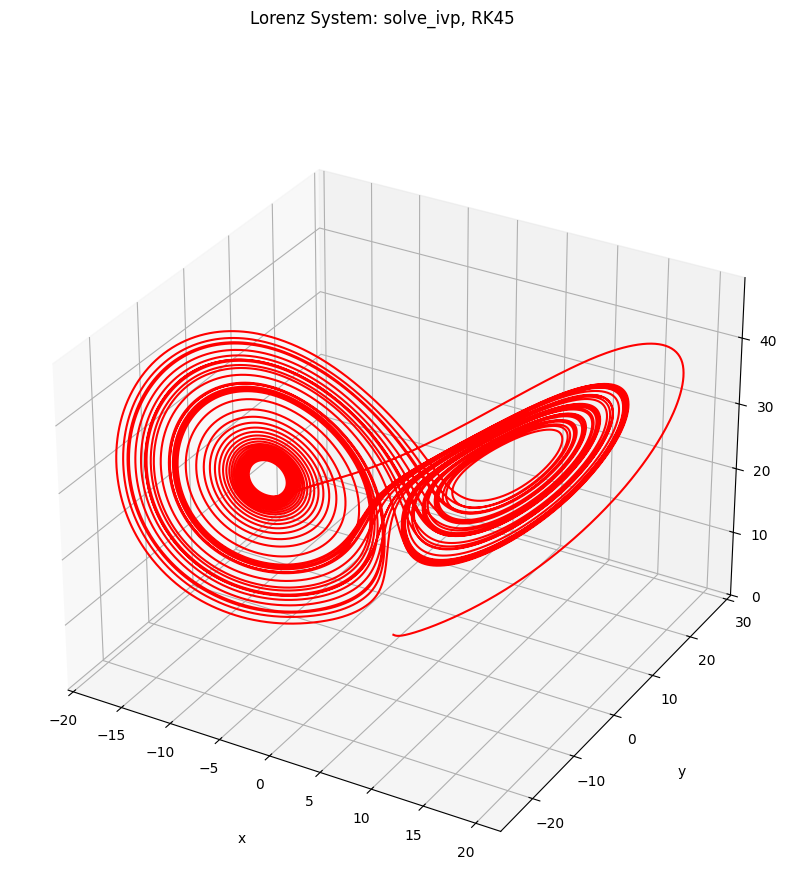

In [12]:
# the book suggests a different starting point for a plot
s0 = np.array([0, 1, 1.05])

# time parameters
inv_dt = 888 # points per unit time, easier to alter manually than dt.
             # inv_dt needs to stay large for smooth evaluation.
t0 = 0
tf = 50

# build a time array
dt = 1.0 / inv_dt
num_steps = int((tf - t0) * inv_dt) + 1
t_eval = np.linspace(t0, tf, num_steps) 

# solve using solve_ivp
solution_ivp = solve_ivp(lorenz_func_ivp, 
                         [t0, tf], 
                         s0, 
                         t_eval=t_eval,
                         method='RK45'
                        )

fig = plt.figure(figsize=(10, 10))
ax = plt.axes(projection='3d')
plt.suptitle("Lorenz System: solve_ivp, RK45")

ax.plot3D(solution_ivp.y[0], solution_ivp.y[1], solution_ivp.y[2], 'r')
ax.set_xlabel('x', labelpad=20)
ax.set_ylabel('y', labelpad=20)
ax.set_zlabel('z', labelpad=20)

plt.show()

The classic form of Lorenz appears quite happily here. Let's take a look at the same function processed through `odeint`.

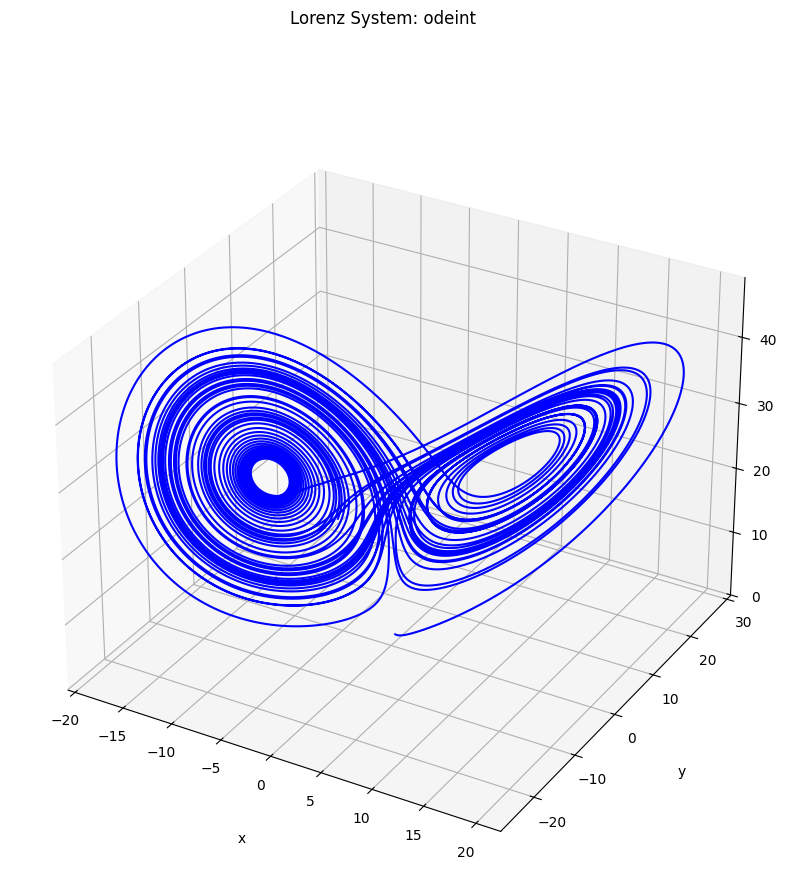

In [13]:
# solve using odeint
solution_odeint = odeint(lorenz_func_odeint, s0, t_eval)

fig = plt.figure(figsize=(10, 10))
ax = plt.axes(projection='3d')
plt.suptitle("Lorenz System: odeint")

ax.plot3D(solution_odeint[:, 0],  # X values
          solution_odeint[:, 1],  # Y values
          solution_odeint[:, 2],  # Z values
          'b')                    # blue line

ax.set_xlabel('x', labelpad=20)
ax.set_ylabel('y', labelpad=20)
ax.set_zlabel('z', labelpad=20)

plt.show()

Both forms are distinctly and clearly related, but we might observe that the connecting strands between the two loci of the `odeint` plot are far less gathered and organized than in the `solve_ivp` version. Again, it's important to remember that both functions test out identically at S(t) = 0, and both diverge rapidly from that.

But, it's also important to remember that the "stock" version (no options) of `odeint` seems to be more accurate (at least in 2D) than the "vanilla" `solve_ivp`, which is what we have above.

Let's experiment a bit and see if we can illustrate the differences more clearly:

In [14]:
from matplotlib.animation import FuncAnimation
import matplotlib.pyplot as plt
import ipywidgets as widgets
from ipywidgets import interact, interactive, fixed, HBox, VBox, Button
import numpy as np
from IPython.display import display, clear_output
import time

# distance between trajectories. this might be slight so we can use scaling if needed in order to see.
divergence = np.linalg.norm(solution_ivp.y - solution_odeint.T, axis=0)

# Performance throttle to reduce processing load
performance_throttle = 5  # cut the steps processed by this amount for performance purposes

# Create output widget for controlled updates
plot_output = widgets.Output()

# Debounce mechanism
last_update_time = time.time()
update_pending = False
current_plot = None

# Interactive divergence visualization
def create_plot(steps=888, throttle=performance_throttle):
    # Fixed parameters that work well
    highlight_steps = 1.0
    divergence_scaling = 1.0
    
    # Calculate stride based on throttle
    stride = max(1, throttle)
    
    fig = plt.figure(figsize=(12, 12))
    ax = fig.add_subplot(111, projection='3d')

    # trajectory from solve_ivp (baseline)
    x, y, z = solution_ivp.y[0, :steps], solution_ivp.y[1, :steps], solution_ivp.y[2, :steps]

    # divergence width calculation
    widths = divergence[:steps] * divergence_scaling

    # Colormap: recent steps purple, older gray
    colors = ['#BBBBBB'] * steps  # gray for old steps
    highlight_length = int(inv_dt * highlight_steps)
    colors[-highlight_length:] = ['#800080'] * highlight_length  # purple for recent steps

    # Plot with proper throttling
    i_values = list(range(0, steps, stride))
    if steps-1 not in i_values:
        i_values.append(steps-1)  # Make sure we include the last point
        
    for i in range(len(i_values)-1):
        idx1, idx2 = i_values[i], i_values[i+1]
        ax.plot(x[idx1:idx2+1], y[idx1:idx2+1], z[idx1:idx2+1],
                linewidth=max(widths[idx2], 0.1),
                color=colors[idx2])

    ax.set_xlim(-20, 20)
    ax.set_ylim(-30, 30)
    ax.set_zlim(0, 50)
    ax.set_xlabel('x', labelpad=10)
    ax.set_ylabel('y', labelpad=10)
    ax.set_zlabel('z', labelpad=10)
    ax.set_title("Lorenz Divergence Visualization\n"
                 "Distances between solve_ivp (RK45) (default) and odeint\n"
                 f"(Steps: {steps}, Throttle: {throttle}x)", fontsize=14)
    
    return fig

def update_plot(steps, throttle):
    global current_plot, last_update_time, update_pending
    
    # Clear previous output and create new plot
    with plot_output:
        clear_output(wait=True)
        current_plot = create_plot(steps, throttle)
        plt.show(current_plot)
    
    last_update_time = time.time()
    update_pending = False

def debounced_update(change):
    global update_pending, last_update_time
    
    # Get current values
    steps = steps_slider.value
    throttle = throttle_slider.value
    
    # If an update is already pending, do nothing
    if update_pending:
        return
    
    # If less than 200ms since last update, delay the update
    current_time = time.time()
    if current_time - last_update_time < 0.2:
        update_pending = True
        # Schedule update after a short delay
        timer = widgets.Button(description="hidden")
        timer.layout.visibility = 'hidden'
        display(timer)
        
        def delayed_update(b):
            update_plot(steps, throttle)
            timer.close()
        
        timer.on_click(delayed_update)
        timer.click()
    else:
        # Update immediately
        update_plot(steps, throttle)

# Create widgets
steps_slider = widgets.IntSlider(
    min=100, 
    max=num_steps, 
    step=100, 
    value=888, 
    description="Steps",
    continuous_update=False  # Only update when released
)

# Create play widget - this will control the steps slider
play_button = widgets.Play(
    min=100,
    max=num_steps,
    step=100,
    interval=50,  # milliseconds between each frame (increased for better performance)
    value=888,
    description="Press play",
    disabled=False
)

# Create throttle slider
throttle_slider = widgets.IntSlider(
    min=1,
    max=10,
    step=1,
    value=performance_throttle,
    description="Throttle",
    continuous_update=False
)

# Link the play widget to the slider
widgets.jslink((play_button, 'value'), (steps_slider, 'value'))

# Connect observers
steps_slider.observe(debounced_update, names='value')
throttle_slider.observe(debounced_update, names='value')

# Display controls and output
controls = HBox([play_button, steps_slider, throttle_slider])
display(controls)
display(plot_output)

# Initial plot
update_plot(steps_slider.value, throttle_slider.value)

Output()